In [25]:
!pip install mnist

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pickle

In [40]:
import mnist

In [64]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [65]:
X = train_images.reshape((train_images.shape[0], train_images.shape[1] * train_images.shape[2]))
y = train_labels

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
transformer = MaxAbsScaler()
X_train = transformer.fit_transform(X_train)
X_test = transformer.fit_transform(X_test)

MaxAbsScaler()

In [10]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Train Score', knn.score(X_train, y_train))
print('Test Score', knn.score(X_test, y_test))

Train Score 0.980375
Test Score 0.9659166666666666


In [11]:
grid_params = {'n_neighbors': list(range(1,15))}

gs = GridSearchCV(KNeighborsClassifier(),
                 grid_params,
                 verbose = 1,
                 n_jobs = -1)

gs_results = gs.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


In [12]:
gs_results.best_score_

0.9683333333333334

In [13]:
gs_results.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [14]:
gs_results.best_params_

{'n_neighbors': 3}

In [95]:
%%time
knn = KNeighborsClassifier(n_neighbors = 3)
X = transformer.fit_transform(X)
knn.fit(X, y)

Wall time: 1.44 s


KNeighborsClassifier(n_neighbors=3)

In [76]:
X_test = test_images.reshape((test_images.shape[0], test_images.shape[1] * test_images.shape[2]))
y_test = test_labels
X_test = transformer.fit_transform(X_test)

In [77]:
y_pred = knn.predict(X_test)

In [79]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [81]:
accuracy_score(y_test, y_pred)

0.9705

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [109]:
confusion_matrix(y_test, y_pred)

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  10,    9,  996,    2,    0,    0,    0,   13,    2,    0],
       [   0,    2,    4,  976,    1,   13,    1,    7,    3,    3],
       [   1,    6,    0,    0,  950,    0,    4,    2,    0,   19],
       [   6,    1,    0,   11,    2,  859,    5,    1,    3,    4],
       [   5,    3,    0,    0,    3,    3,  944,    0,    0,    0],
       [   0,   21,    5,    0,    1,    0,    0,  991,    0,   10],
       [   8,    2,    4,   16,    8,   11,    3,    4,  914,    4],
       [   4,    5,    2,    8,    9,    2,    1,    8,    2,  968]],
      dtype=int64)

In [111]:
df_confusion = pd.crosstab(y_test, y_pred)
df_confusion

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,974,1,1,0,0,1,2,1,0,0
1,0,1133,2,0,0,0,0,0,0,0
2,10,9,996,2,0,0,0,13,2,0
3,0,2,4,976,1,13,1,7,3,3
4,1,6,0,0,950,0,4,2,0,19
5,6,1,0,11,2,859,5,1,3,4
6,5,3,0,0,3,3,944,0,0,0
7,0,21,5,0,1,0,0,991,0,10
8,8,2,4,16,8,11,3,4,914,4


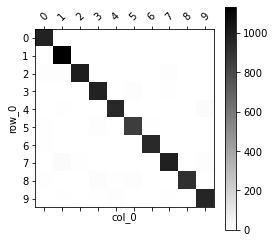

In [112]:
def plot_confusion_matrix(df_confusion, title='Matrice de confusion', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)

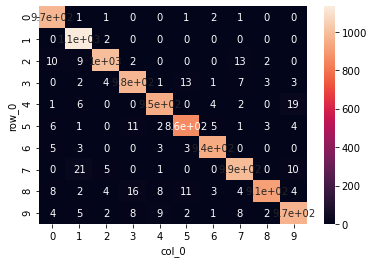

In [120]:
import seaborn as sns

confusion_matrix = pd.crosstab(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [116]:
# save the model to disk
filename = 'joymnist_KNN.sav'
pickle.dump(gs, open(filename, 'wb'))

In [84]:
#later... load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))